# Roomba simulation

* Room that is 15x20 ft
* Each "tick" (unit of time) the Roomba moves 1 foot or until it hits a wall. Whatever spot (1 ft x 1 ft square) the roomba is in at this time is considered cleaned
* The Roomba does not keep track of where it's been, the only thing it knows is the number of degrees it last turned
* Our default (base) Roomba follows these rules:
  * Move in a straight line until it hits a wall
  * Rotate randomly from 90-270 degrees

In [1]:
import math
import random
import matplotlib.pyplot as plt
import statistics as st

In [2]:
%matplotlib inline

In [3]:
def angle_to_x_y(degrees, dist=1):
    radians = math.radians(degrees)
    x = dist * math.cos(radians)
    y = dist * math.sin(radians)
    return x, y

In [8]:
angle_to_x_y(45, 1)

(0.7071067811865476, 0.7071067811865475)

In [10]:
math.sqrt(2)/2

0.7071067811865476

In [13]:
class Room:
    """
    Responsibilities:
    - Dimensions (width & height)
    - keep track of how much of the room has been cleaned
    """
    
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.clean_squares = set()
    
    def reset(self):
        self.clean_squares = set()
    
    def pick_random_location(self):
        x = random.uniform(0, self.width)
        y = random.uniform(0, self.height)
        return x, y
    
    def how_much_cleaned(self):
        return len(self.clean_squares) / self.total_squares()
    
    def total_squares(self):
        return self.width * self.height
    
    def in_room(self, x, y):
        if 0 < x < self.width and 0 < y < self.height:
            return True
        else:
            return False
    
    def clean_square(self, x, y):
        x = int(x)
        y = int(y)
        self.clean_squares.add((x, y))



In [18]:
bedroom = Room(4, 3)
print(bedroom.how_much_cleaned())
bedroom.clean_square(1.8, 0.9)
print(bedroom.how_much_cleaned())
bedroom.clean_square(2.6, 0.9)
print(bedroom.how_much_cleaned())
bedroom.clean_square(2.6, 0.9)
print(bedroom.how_much_cleaned())


0.0
0.08333333333333333
0.16666666666666666
0.16666666666666666


In [16]:
1/12

0.08333333333333333

In [42]:
class Roomba:
    """
    Responsibilities:
    - know its current angle
    - have a response for hitting a wall
    - report its relative x and y movement
    - know its speed
    - change its angle
    """
    
    def __init__(self, speed=1, angle=0):
        self.angle = angle
        self.speed = speed
    
    def move(self):
        return angle_to_x_y(self.angle, self.speed)
    
    def turn(self, turn_amount):
        self.angle += turn_amount
        self.angle %= 360
    
    def hit_wall(self):
        self.turn(random.uniform(90, 270))
        
class SmartRoomba(Roomba):
    def __init__(self, speed=1, angle=0):
        super().__init__(speed, angle)
        
    def hit_wall(self):
        self.turn(random.uniform(160, 220))

In [29]:
class Simulation:
    """
    Responsibilities:
    - place the Roomba
    - figure out where the Roomba is moving (by asking it)
    - updating the room
    - iterating over ticks
    - keeping track of some stats as the room is cleaned
    
    Collaborators:
    - Roomba
    - Room
    """
    
    def __init__(self, room, roomba):
        self.room = room
        self.roomba = roomba
        self.reset()
    
    def reset(self):
        self.ticks = 0
        
        initial_x, initial_y = self.room.pick_random_location()
        initial_angle = random.uniform(0, 360)
        
        self.current_x = initial_x
        self.current_y = initial_y
        self.roomba.angle = initial_angle
    
    def update_roomba(self):
        change_x, change_y = self.roomba.move()
        
        # check to see if we've hit the wall
        # if so, let the roomba know and get new values
        
        new_x = self.current_x + change_x
        new_y = self.current_y + change_y
        
        if self.room.in_room(new_x, new_y):
            # the roomba moves!
            self.current_x = new_x
            self.current_y = new_y
        else:
            self.roomba.hit_wall()
        
    def iterate(self):
        self.ticks += 1
        self.update_roomba()
        self.room.clean_square(self.current_x, self.current_y)
    
    def get_stats(self):
        return {
            'ticks': self.ticks,
            'ratio_cleaned': self.room.how_much_cleaned(),
            'roomba_location': (self.current_x, self.current_y),
            'roomba_angle': self.roomba.angle
        }
    
    def run_simulation(self):
        stats = []
        self.reset()
        self.room.clean_square(self.current_x, self.current_y)
        while self.room.how_much_cleaned() < 1.0:
            stats.append(self.get_stats())
            self.iterate()
        
        stats.append(self.get_stats())
        return stats


In [50]:
sally = Roomba()
amanda = SmartRoomba()
bedroom1 = Room(10, 15)
bedroom2 = Room(10, 15)

sim1 = Simulation(bedroom1, sally)
sim2 = Simulation(bedroom2, amanda)



print(len(sim1.run_simulation()))
print(len(sim2.run_simulation()))



1001
1428


1180


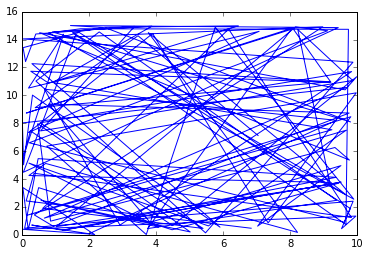

In [41]:
x_values = [
    stat['roomba_location'][0]
    for stat in results
]
y_values = [
    stat['roomba_location'][1]
    for stat in results
]

print(len(x_values))

plt.plot(x_values, y_values)
plt.show()


In [ ]:
for _ in range(20):
    sim1.run()